### Read Korean Ballad Lyrics Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
# designate root path for the data
DATA_ROOT_PATH = "./data"

# designate path for each dataset files
LYRIC_PATH = os.path.join(DATA_ROOT_PATH, "lyrics_kor.txt")
BILLBOARD_PATH = os.path.join(DATA_ROOT_PATH, "rawdata_김지훈_201500844.tsv")
GEULSTAGRAM_PATH = os.path.join(DATA_ROOT_PATH, "geulstagram.csv")

In [3]:
# read txt file from line by line
def read_txt(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines

sample_lyrics = read_txt(LYRIC_PATH)[:10]
sample_lyrics

['내 곁에서 떠나가지 말아요 \n',
 '그대없는 밤은 너무 쓸쓸해 \n',
 '그대가 더 잘 알고 있잖아요 \n',
 '제발 아무말도 하지 말아요\n',
 '나약한 내가 뭘 할수 있을까 생각을 해봐\n',
 '그대가 내겐 전부였었는데 음~오 \n',
 '제발 내 곁에서 떠나가지 말아요\n',
 '그대없는 밤은 너무 싫어\n',
 '우~우~우~ 돌이킬수 없는 그대 마음 \n',
 '우~우~우~ 이제와서 다시 어쩌려나\n']

In [4]:
import re

stopwords = [
    "사연을 읽어주는 여자",
    "메시지 지금 동건 글",
    "전송됨",
    "가희 글",
    "공유",
    "댓글",
    "오후",
    "오전"
    "등등",
    "중략",
    "신중근",
    "신중군"
]

# make preprocessing function
def preprocess(list_lines:list) -> list:
    # remove \n
    removed_lines = [line.strip() for line in list_lines]

    # filter stopwords from the line item in list_lines using regex
    removed_lines = []
    for line in list_lines:
        for stopword in stopwords:
            line = re.sub(stopword, '', line)
        removed_lines.append(line)

    # remove empty lines
    removed_lines = [line for line in removed_lines if line]
    
    # remove duplicate elements from the removed_lines
    removed_lines = list(set(removed_lines))

    # strip whitespace
    removed_lines = [sentence.strip() for sentence in removed_lines]

    # remove one letter items
    removed_lines = [sentence for sentence in removed_lines if len(sentence) > 1]

    return removed_lines

preprocess(sample_lyrics)

['우~우~우~ 돌이킬수 없는 그대 마음',
 '나약한 내가 뭘 할수 있을까 생각을 해봐',
 '제발 내 곁에서 떠나가지 말아요',
 '내 곁에서 떠나가지 말아요',
 '그대없는 밤은 너무 쓸쓸해',
 '우~우~우~ 이제와서 다시 어쩌려나',
 '그대가 내겐 전부였었는데 음~오',
 '그대없는 밤은 너무 싫어',
 '제발 아무말도 하지 말아요',
 '그대가 더 잘 알고 있잖아요']

### Read Korean Billboard Song dataset

In [5]:
# read and load from tsv
df_billboard = pd.read_csv(BILLBOARD_PATH, sep='\t')
print(df_billboard.shape)
df_billboard.head(3)

(2276, 5)


,ID,Year,Title,Singer,Lyric
0,1,1964,동백아가씨,이미자,헤일 수 없이 수많은 밤을 내 가슴 도려내는 아픔에 겨워 얼마나 울었던가 동백아가씨...
1,2,1964,마도로스 부기,백야성,항구의 일~~번지 부기우기 일~번지 그라스를 채워~다오 부기우기 아~~가씨 고동이 ...
2,3,1964,이국땅,남일해,하룻밤 뱃길이면 가고 오건만 못 가는 이국땅에 서러움이 많 아현해탄 파도 위에 비친...


In [6]:
# filter by year where year is greater than 2015
df_billboard_recent = df_billboard[df_billboard['Year'] > 2010]
# remove row where Lyric contains "청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다."
df_billboard_recent = df_billboard_recent[df_billboard_recent['Lyric'].str.contains("청소년 보호법에 따라 성인 인증이 필요한 콘텐츠 입니다.") == False]
# display head of the dataframe
df_billboard_recent.head(3)

,ID,Year,Title,Singer,Lyric
1832,1833,2011,여우야,투개월,창 밖엔 서글픈 비만 내려오네 내 마음 너무 안타까워 이제 다시 볼 수가 없기에 처...
1833,1834,2011,Lonely,2NE1,지금 내가 하는 얘기 널 아프게 할지 몰라 아마 날 죽도록 미워하게 될 꺼야 내가 ...
1834,1835,2011,나만 몰랐던 이야기,아이유,정말 넌 다 잊었더라 반갑게 날 보는 너의 얼굴 보니 그제야 어렴풋이 아파오더라 새...


### Read Geulstagram dataset

In [7]:
df_geulstagram = pd.read_csv(GEULSTAGRAM_PATH)
print(df_geulstagram.shape)
df_geulstagram.head(3)

(25179, 8)


,Unnamed: 0,USER_ID,Image_Content_txt,Image_Content_txt_result,Content_txt,Hashtags,Hashtags_result,Spell_Checked_Content
0,0,1day1poem,XXL 칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 ...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어...,칫솔은 새 것인데 솔질이 새 것 아니니 잇몸에 피가 난다. 저 뻣뻣한 것을 다 벌...,"['가능하면1일1시', '190706', '임재건', '1일1시', '다시는사랑이없...","['자작시', '시', '시스타그램', '감성', '감성글', '공감', '공감글'...",칫솔은 새것인데 솔질이 새것 아니니 잇몸에 피가 난다. 저 뺏뻣한 것을 다 벌어진 ...
1,1,1day1poem,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라. ...,아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라...,"['가능하면1일1시', '190701', '임재건', '다시는사랑이없을줄알았습니다'...","['벗', '혐오', '호불호', '자작시', '시', '시스타그램', '감성', ...",아무도 미워하지 않으니 아무도 좋다지 않는다. 요즘은 미운 것이 같아야 벗이라더라....
2,2,1day1poem,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...,어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 ...,"['가능하면1일1시', '190807', '임재건', '1일1시', '다시는사랑이없...","['달달', '달', '초승달', '보름달', '밤', '하늘', '자작시', '시...",어제 초승이던 것이 오늘 보름이겠느냐만 너는 밤하늘 둥근 빛이라도 달은 아니므로 벌...


In [8]:
# check non null items in the dataframe
df_geulstagram.isnull().sum()

Unnamed: 0                    0
USER_ID                       0
Image_Content_txt             0
Image_Content_txt_result     30
Content_txt                   0
Hashtags                      0
Hashtags_result               0
Spell_Checked_Content       616
dtype: int64

In [9]:
# drop null items
df_geulstagram.dropna(inplace=True)

### Concatanate Ballad, Billboard, Geulstagram into one list

In [10]:
import numpy as np

# make sampling function from the list
def sampling(list_lines:list, n:int) -> list:
    # sampling
    list_lines = np.random.choice(list_lines, n)
    list_lines = list(list_lines)
    return list_lines

In [11]:
list_poetic_sentences = []

# load lists
list_lyrics = read_txt(LYRIC_PATH)
list_billboard = df_billboard_recent['Lyric'].tolist()
list_geulstagram = df_geulstagram['Spell_Checked_Content'].tolist()

# concatenate lists
list_poetic_sentences = list_lyrics + list_billboard + list_geulstagram
print(len(list_poetic_sentences))

sampling(list_poetic_sentences, 10)

87342


['밤이면 작은 술잔 기울이더니\n',
 '발길에 부딪히는 사랑의 추억\n',
 '서로 가슴 부여잡고 사랑하다가 모진 말 뱉어가며 가슴 뜯는다. 뜯긴 자리 시리고 또한 허하여 내가 뜯은 당신으로 자릴 메운다.  사랑에서 이별까지 마음을 나눠 갖는 일 가슴 당신으로 메워 생각나겠죠.',
 '내가 너에게 할 수 있는 유일한 건 괜찮은 척 나는 또 괜찮다고 말해버렸다',
 '부드러운 음악이 흘렀지\n',
 '긴 혀를 내두른다\n',
 '날 울게 해\n',
 '비추겠네\n',
 '카페인에 가슴 콩콩인다고 커피 하나 나누잔다. 너는 커피라는데 내 가슴 콩콩이는 건 무어라니. 카페인',
 '깨어진 꿈이었나\n']

In [12]:
def break_sentence(list_sentences:list) -> list:
    """ 
    break the string items of the list_poetic_sentences by ".", "!", "?" 
    into two different string and and back to the list 
    """
    
    # replace ".", "!", "?" as "SEPARATOR"
    list_sentences = [sentence.replace(".", "SEPARATOR").replace("!", "SEPARATOR").replace("?", "SEPARATOR") for sentence in list_sentences]
        
    # split string item into sublist
    list_sentences = [sentence.split("SEPARATOR") for sentence in list_sentences]
    
    # drop empty items
    list_sentences = [sentence for sentence in list_sentences if sentence]

    # pull out items from the nested list
    list_sentences = [item for sublist in list_sentences for item in sublist]

    # apply preprocessing function for each item in line_sentences
    list_sentences = preprocess(list_sentences)

    return list_sentences

list_sentences = break_sentence(list_poetic_sentences)
print(len(list_sentences))
sampling(list_sentences, 20)

78822


['누구라도    정이 갑니다',
 '그대가 진정 나를',
 '네 곁에는 그런 너를 예뻐해 주고 좋아해 주는 사람도 참 많이 있을 테니까',
 '다 미워',
 '산지기의 말 내려야지',
 '다신 돌아오지 않을 순간들 지나고 나서야 소중함을 느끼는 순간들 그런 순간들은 모두 그저 그런 평범한 날들이었다 지금 현재 평범한 날들의 행복을 놓치지 않기를',
 '또 하루하루 멀어지지만',
 '아무리 노력을 한다 해도 최선을 다한다 해도 안 되는 일이 있기 마련입니다',
 '이 몸과 마음 철부지',
 '이정현  함부로 설레는 마음 중에서',
 '우리가 어떤 세상을 살아갈지를 우리 스스로 결정하는 거예요',
 '지나간 일에 쓸데없이 홀로 실랑이고 있는 나를 보았다 흘려도 되는 것을 왜 붙잡고 있을까 나만 괴로운 것을 지나간 글',
 '토요일 지겹다 이 감정 이 기분 이 느낌 이 공기',
 '좀 다른 기분 으음',
 '그토록 힘든 하루를 보냈음에도 지금 이 순간 웃을 수 있는 당신은 참 아름다운 사람이에요',
 '경호원이니까 옆에서 경호를 잘 니까',
 '광활한 들판이 어떤 것 과도 자리다 등을 하지 않듯이 나 자신부터 열린 마음으로 상대방을 대한다면 일체의 시비가 끼어들지 않을 것입니다 열린 마음의 시작은 낮 두는 자세부터 시작됩니다',
 '그대를 글로 적노라면 비 오는 날엔 비라고 꽃 가득이면 꽃이라고 별꽉찬 밤이면 떨이라고 적겠습니다',
 '진석  밖에 춥다',
 '그 사람은 네가 무슨 말을 하든 무슨 일을 하든 싫어할 거야 너를 바라보는 부정적인 시선이니까 너를 좋아해 주는 사람은 그렇지 않아 무슨 말을 하든 무슨 일을 하든 좋아할 거야 너를 바라보는 긍정적인 시선이니까']

In [13]:
# https://github.com/likejazz/korean-sentence-splitter
# use kss to split sentences that are too long

In [15]:
# save the list of sentences to a txt file
with open(os.path.join(DATA_ROOT_PATH, "poetic_sentences_kor.txt"), 'w', encoding='utf-8') as f:
    for sentence in list_sentences:
        f.write(sentence + '\n')


### Remove Authorship from the sentences (Work in Progress)

In [ ]:
# using NER tagging function of pororo: https://kakaobrain.github.io/pororo/tagging/ner.html
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")
pos_tagged = ner('데일 카네기 인간관계론')
pos_tagged

In [ ]:
from tqdm import tqdm
from pororo import Pororo
ner = Pororo(task="ner", lang="ko")

sample_list = [
    '감성 조각사 한웅',
    '전송됨',
    '요즘은 얼리버드라는 할인 상품도 많고',
    '널 사랑하는 건 힘들지 않아 사랑하지 않는 게 힘든 거지 차돌',
    '어쩌면 세상에서 진실로 두려워해야 하는 것은 눈이 있어도 아름다운 걸 볼 줄 모르고 귀가 있어도 음악을 듣지 않고 또 마음이 있어도 참된 것을 이해하지 못하고 감동하지도 못하며 더구나 가슴속의 열정을 불사르지도 못하는 그런 사람들이 아닐까 구로야나기 테스코  창가의 토토 중에서',
]

# filter "PERSON" tags from the list
def filter_person(list_sentences:list) -> list:
    for item in tqdm(list_sentences):
        list_pos_tagged = ner(item)
        for string, pos_tag in list_pos_tagged:
            if pos_tag == "PERSON":
                list_sentences.remove(item)
    return list_sentences

# filter_person(sample_list)

### EDA (Work in Progress)

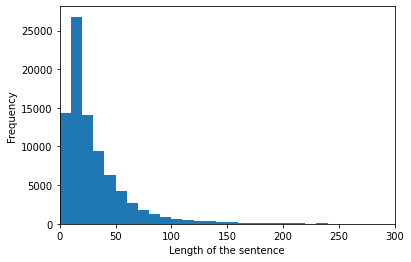

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# check the length distribution of the list with x ticks divided by 10 characters
plt.hist(list(map(len, list_sentences)), bins=np.arange(0, max(list(map(len, list_sentences)))+1, 10))
plt.xlim(0, 300) # set x tick limit to 300
plt.xlabel("Length of the sentence")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# check the distribution of the starting character of the list_poetic_sentences
# "가", "나","다" 등 시작하는 글자들에 따른 분포 확인할 필요 있음